# PACKAGES

In [1]:
import numpy as np
import pandas as pd
#import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import gensim
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime

pd.set_option('max_colwidth', 800)

In [2]:
from nltk.corpus import PlaintextCorpusReader
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
#from langdetect import detect
stop_words = stopwords.words('english')

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Rajnish
[nltk_data]     Julka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
rev = pd.read_csv("yelp_reviews_Restaurant_AZ.csv")

# DATA EXPLORATION

In [5]:
rev.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,review_stars,text,date,AZ_state
0,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032.0,33.602822,-111.983533,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'False', 'BikeParking': 'True', 'RestaurantsAttire': ""u'casual'"", 'RestaurantsReservations': 'False', 'Ambience': ""{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"", 'RestaurantsGoodForGroups': 'True', 'Alcohol': ""u'none'"", 'RestaurantsDelivery': 'False', 'HasTV': 'False', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}""}","Food, Pretzels, Bakeries, Fast Food, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0', 'Wednesday': '10:0-21:0', 'Thursday': '10:0-21:0', 'Friday': '10:0-21:0', 'Saturday': '10:0-21:0', 'Sunday': '11:0-18:0'}",7C4B2Skmh4X9f8xJDo9O4w,5,"Love Wetzel's pretzels! I always get them when I'm at the mall! \n\nIf you download their app you get rewards for a free pretzel. \n\nI love the Wetzel's bites either salty or cinnamon. The Wetzel's dog bites are okay, they taste like hot dogs.",2018-07-08 08:44:17,True
1,xFc50drSPxXkcLvX5ygqrg,Boomer's Sweet Home Chicago,"5932 W Bell Rd, Ste D-109",Glendale,AZ,85308.0,33.640391,-112.187028,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",NaN,-MpNNYmecoWws3Jp0Tn-aA,5,"We just recently discovered this place and I just wish we have discovered it sooner!\n\nThe hot dogs are to die for! They are perfectly snappy with all the traditional Chicago fixin's on poppy seed bun. Yum!\n\nI love the fries which are served in generous sized portions and always come out so hot, fresh, and crisp! \n\nThe Italian Beef is a heck of a sandwich with tender meat, lots of peppers, delicious bread, and au jus!\n\nMy girls and I are huge fans of their sliders. Not quite up to the standard of my absolute favorite White Castles but still very tasty!",2011-01-09 22:55:07,True
2,xFc50drSPxXkcLvX5ygqrg,Boomer's Sweet Home Chicago,"5932 W Bell Rd, Ste D-109",Glendale,AZ,85308.0,33.640391,-112.187028,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",NaN,ivTMEVdpZOeFOLtBY_cH9g,5,"I can't believe I never knew about a place that is a mere five minutes away from me, in a complex that I shop at frequently, until earlier today. I found all the reviews from here very tempting, and so too were the prices. \n\nI ordered a Chicago dog and two cheese sliders, both with everything on them. The dog was THE BEST Chicago dog I've had in Arizona, and I've lived here for 22 years. However, the hot dog was not the pinnacle of my meal. The cheese sliders were A-MAZING. The best I've ever had...anywhere. They were slightly bigger than I expected, but I wished I had ordered more when I was done with them.\n\nI took advantage of their take-out, since I dined alone, but the actual dining area is a lot bigger than one wo

In [9]:
rev.shape

(1442738, 19)

In [10]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442738 entries, 0 to 1442737
Data columns (total 19 columns):
business_id     1442738 non-null object
name            1442738 non-null object
address         1439184 non-null object
city            1442738 non-null object
state           1442738 non-null object
postal_code     1442513 non-null float64
latitude        1442738 non-null float64
longitude       1442738 non-null float64
stars           1442738 non-null float64
review_count    1442738 non-null int64
is_open         1442738 non-null int64
attributes      1441993 non-null object
categories      1442738 non-null object
hours           1387001 non-null object
user_id         1442738 non-null object
review_stars    1442738 non-null int64
text            1442738 non-null object
date            1442738 non-null object
AZ_state        1442738 non-null bool
dtypes: bool(1), float64(4), int64(3), object(11)
memory usage: 199.5+ MB


In [11]:
rev.isnull().sum()

business_id         0
name                0
address          3554
city                0
state               0
postal_code       225
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes        745
categories          0
hours           55737
user_id             0
review_stars        0
text                0
date                0
AZ_state            0
dtype: int64

In [4]:
rev.drop(['business_id','address','postal_code','state',
          'hours','user_id','AZ_state','latitude','longitude'],axis=1,inplace=True)

In [13]:
rev.isnull().sum()

name              0
city              0
stars             0
review_count      0
is_open           0
attributes      745
categories        0
review_stars      0
text              0
date              0
dtype: int64

In [14]:
# Checking 'is_open' status for each Restaurant
rev[rev['name'] == "China Gourmet"]

,name,city,stars,review_count,is_open,attributes,categories,review_stars,text,date
4,China Gourmet,Mesa,3.0,13,0,"{'RestaurantsPriceRange2': '1', 'RestaurantsAttire': ""'casual'"", 'OutdoorSeating': 'False', 'GoodForKids': 'True', 'NoiseLevel': ""u'quiet'"", 'RestaurantsGoodForGroups': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}"", 'RestaurantsDelivery': 'True', 'WiFi': ""'no'"", 'RestaurantsTakeOut': 'True', 'RestaurantsReservations': 'False', 'BusinessAcceptsCreditCards': 'True', 'BikeParking': 'False'}","Chinese, Restaurants",4,"We've tried a few different Chinese delivery places. I'll admit I'm not a huge fan of Chinese food. But this place had some good food. I like the shrimp lo mein and kung pow shrimp. The shrimp was juicy, unlike some other places we tried. It is also a good price with huge portions! \nDon't order the poo poo platter though, none of the items in it were good.",2014-12-19 04:59:07
5,China Gourmet,Mesa,3.0,13,0,"{'RestaurantsPriceRange2': '1', 'RestaurantsAttire': ""'casual'"", 'OutdoorSeating': 'False', 'GoodForKids': 'True', 'NoiseLevel': ""u'quiet'"", 'RestaurantsGoodForGroups': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}"", 'RestaurantsDelivery': 'True', 'WiFi': ""'no'"", 'RestaurantsTakeOut': 'True', 'RestaurantsReservations': 'False', 'BusinessAcceptsCreditCards': 'True', 'BikeParking': 'False'}","Chinese, Restaurants",4,"My expectations of chinese delivery places in Gilbert or Mesa are pretty low, but this place is SOO much better than anything we've ordered in the area before.\n\nI'm actually eating my kung pao chicken now and was moved by its yumminess to hop on Yelp and write a quick review.\n\nThe portions are very generous. The food is actually pretty darn good and they deliver.",2008-12-11 23:09:11
6,China Gourmet,Mesa,3.0,13,0,"{'RestaurantsPriceRange2': '1', 'RestaurantsAttire': ""'casual'"", 'OutdoorSeating': 'False', 'GoodForKids': 'True', 'NoiseLevel': ""u'quiet'"", 'RestaurantsGoodForGroups': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}"", 'RestaurantsDelivery': 'True', 'WiFi': ""'no'"", 'RestaurantsTakeOut': 'True', 'RestaurantsReservations': 'False', 'BusinessAcceptsCreditCards': 'True', 'BikeParking': 'False'}","Chinese, Restaurants",1,"This place only gets one star because the system will not let me post the comment without any stars. \nI would never eat here again. We ordered delivery, as I am moving and packing. This place about a mile from my home. When speaking with the woman who answered the phone, she couldn't understand what I was asking for and I couldn't understand her broken English. I was promised our order within 45 minutes. I called back after an hour and was told it would be here in 5 minutes. 15 minutes later our food arrived, an hour an 15 min after I had ordered. We ordered Tso's chicken, chicken lo mien, vegetable fried rice, and fried wontons. \nThe Tso's Chicken was over cooked and dry. Also, had a gamey after-taste. Is chicken ever supposed to have a gamey taste? BARF! I had one bite and we threw...",2012-08-18 23:28:07
7,China Gourmet,Mesa,3.0,13,0,"{'RestaurantsPriceRange2': '1', 'RestaurantsAttire': ""'casual'"", 'OutdoorSeating': 'False', 'GoodForKids': 'True', 'NoiseLevel': ""u'quiet'"", 'RestaurantsGoodForGroups': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}"", 'RestaurantsDelivery': 'True', 'WiFi': ""'no'"", 'RestaurantsTakeOut': 'True', 'RestaurantsReservations': 'False', 'BusinessAcceptsCreditCards': 'True', 'BikeParking': 'False'}","Chinese, Restaurants",1,"This place is exactly why I rarely eat Chinese anymore instead favoring the lighter, fresher Vietnamese food. Staying at Best Western and had delivery. So was not expecting it to be excellent because delivery by its nature j

In [15]:
rev.head()

,name,city,stars,review_count,is_open,attributes,categories,review_stars,text,date
0,Wetzel's Pretzels,Phoenix,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'False', 'BikeParking': 'True', 'RestaurantsAttire': ""u'casual'"", 'RestaurantsReservations': 'False', 'Ambience': ""{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"", 'RestaurantsGoodForGroups': 'True', 'Alcohol': ""u'none'"", 'RestaurantsDelivery': 'False', 'HasTV': 'False', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}""}","Food, Pretzels, Bakeries, Fast Food, Restaurants",5,"Love Wetzel's pretzels! I always get them when I'm at the mall! \n\nIf you download their app you get rewards for a free pretzel. \n\nI love the Wetzel's bites either salty or cinnamon. The Wetzel's dog bites are okay, they taste like hot dogs.",2018-07-08 08:44:17
1,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"We just recently discovered this place and I just wish we have discovered it sooner!\n\nThe hot dogs are to die for! They are perfectly snappy with all the traditional Chicago fixin's on poppy seed bun. Yum!\n\nI love the fries which are served in generous sized portions and always come out so hot, fresh, and crisp! \n\nThe Italian Beef is a heck of a sandwich with tender meat, lots of peppers, delicious bread, and au jus!\n\nMy girls and I are huge fans of their sliders. Not quite up to the standard of my absolute favorite White Castles but still very tasty!",2011-01-09 22:55:07
2,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"I can't believe I never knew about a place that is a mere five minutes away from me, in a complex that I shop at frequently, until earlier today. I found all the reviews from here very tempting, and so too were the prices. \n\nI ordered a Chicago dog and two cheese sliders, both with everything on them. The dog was THE BEST Chicago dog I've had in Arizona, and I've lived here for 22 years. However, the hot dog was not the pinnacle of my meal. The cheese sliders were A-MAZING. The best I've ever had...anywhere. They were slightly bigger than I expected, but I wished I had ordered more when I was done with them.\n\nI took advantage of their take-out, since I dined alone, but the actual dining area is a lot bigger than one would think by looking at it from the outside. Lot's of Ch...",2009-08-08 03:41:30
3,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",3,The one thin

In [16]:
rev.review_stars.unique()

array([5, 3, 4, 1, 2], dtype=int64)

In [17]:
rev.stars.unique()

array([4. , 3.5, 3. , 2.5, 2. , 4.5, 1.5, 5. , 1. ])

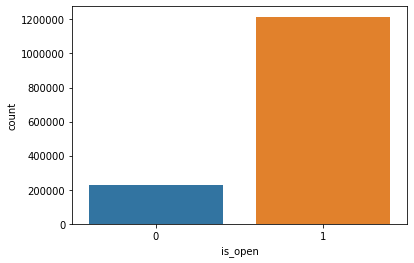

In [18]:
sns.countplot(rev.is_open)

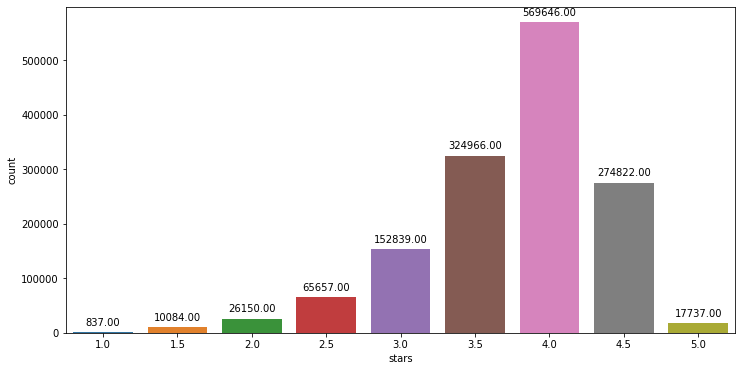

In [19]:
plt.figure(figsize=(12,6))
S1 = sns.countplot(rev.stars)

for p in S1.patches:
    S1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

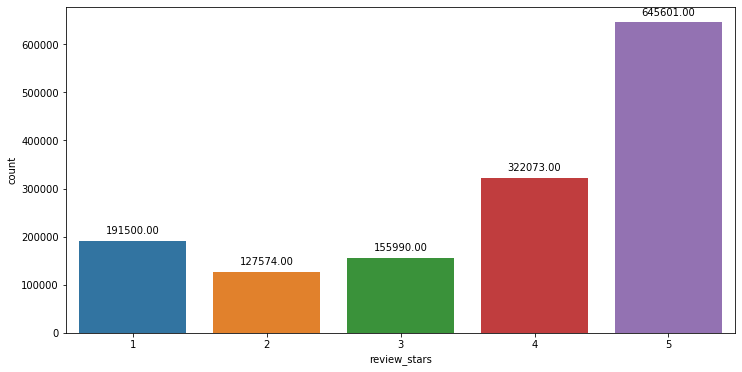

In [20]:
plt.figure(figsize=(12,6))
S1 = sns.countplot(rev.review_stars)

for p in S1.patches:
    S1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

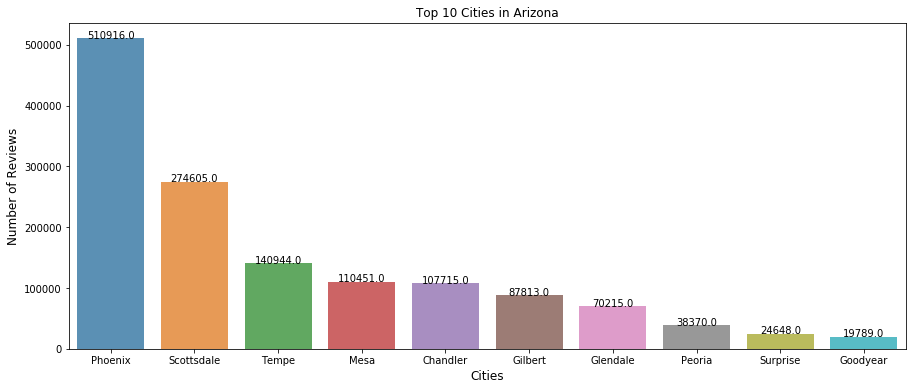

In [21]:
revcity  = rev["city"].value_counts()
revcity = revcity[:10,]
plt.figure(figsize=(15,6))
graph = sns.barplot(revcity.index, revcity.values, alpha=0.8)
plt.title('Top 10 Cities in Arizona')
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Cities', fontsize=12)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    
plt.show()

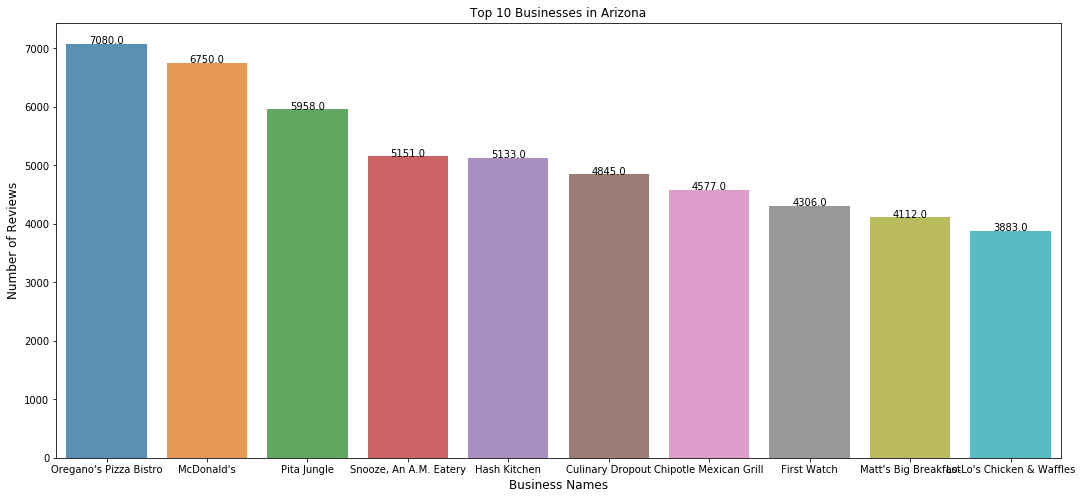

In [22]:
revname  = rev["name"].value_counts()
revname = revname[:10,]
plt.figure(figsize=(18,8))
graph = sns.barplot(revname.index, revname.values, alpha=0.8)
plt.title('Top 10 Businesses in Arizona')
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Business Names', fontsize=12)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    
plt.show()

In [5]:
rev['date'] = pd.to_datetime(rev['date'])
rev['date_new'] = rev['date'].dt.date
rev['year'] = rev['date'].dt.year
rev.drop(['date'],axis=1,inplace=True)

In [25]:
rev.head()

,name,city,stars,review_count,is_open,attributes,categories,review_stars,text,date_new,year
0,Wetzel's Pretzels,Phoenix,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'False', 'BikeParking': 'True', 'RestaurantsAttire': ""u'casual'"", 'RestaurantsReservations': 'False', 'Ambience': ""{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"", 'RestaurantsGoodForGroups': 'True', 'Alcohol': ""u'none'"", 'RestaurantsDelivery': 'False', 'HasTV': 'False', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}""}","Food, Pretzels, Bakeries, Fast Food, Restaurants",5,"Love Wetzel's pretzels! I always get them when I'm at the mall! \n\nIf you download their app you get rewards for a free pretzel. \n\nI love the Wetzel's bites either salty or cinnamon. The Wetzel's dog bites are okay, they taste like hot dogs.",2018-07-08,2018
1,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"We just recently discovered this place and I just wish we have discovered it sooner!\n\nThe hot dogs are to die for! They are perfectly snappy with all the traditional Chicago fixin's on poppy seed bun. Yum!\n\nI love the fries which are served in generous sized portions and always come out so hot, fresh, and crisp! \n\nThe Italian Beef is a heck of a sandwich with tender meat, lots of peppers, delicious bread, and au jus!\n\nMy girls and I are huge fans of their sliders. Not quite up to the standard of my absolute favorite White Castles but still very tasty!",2011-01-09,2011
2,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"I can't believe I never knew about a place that is a mere five minutes away from me, in a complex that I shop at frequently, until earlier today. I found all the reviews from here very tempting, and so too were the prices. \n\nI ordered a Chicago dog and two cheese sliders, both with everything on them. The dog was THE BEST Chicago dog I've had in Arizona, and I've lived here for 22 years. However, the hot dog was not the pinnacle of my meal. The cheese sliders were A-MAZING. The best I've ever had...anywhere. They were slightly bigger than I expected, but I wished I had ordered more when I was done with them.\n\nI took advantage of their take-out, since I dined alone, but the actual dining area is a lot bigger than one would think by looking at it from the outside. Lot's of Ch...",2009-08-08,2009
3,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",3,The one thing k

In [26]:
rev['date_new'].value_counts()

2019-02-17    1072
2018-03-11    1071
2019-03-10    1051
2018-03-25    1033
2019-02-10    1010
2019-03-24    1010
2018-03-04    1005
2018-04-15     998
2018-02-18     993
2018-02-25     985
2019-03-17     984
2018-08-05     971
2019-02-24     968
2019-03-31     958
2018-04-22     953
2019-03-03     948
2019-01-20     938
2018-04-08     930
2019-01-06     921
2018-07-29     921
2018-07-22     920
2018-03-17     916
2017-08-13     915
2019-03-02     912
2018-03-10     911
2018-08-12     909
2018-01-28     899
2018-03-18     898
2019-06-30     897
2019-03-16     896
              ... 
2006-05-05       1
2006-09-16       1
2005-05-20       1
2005-05-02       1
2005-12-17       1
2006-03-26       1
2006-03-06       1
2006-11-10       1
2005-03-29       1
2005-08-20       1
2006-07-23       1
2006-06-13       1
2005-07-11       1
2006-10-24       1
2006-11-17       1
2005-02-02       1
2006-03-25       1
2007-02-17       1
2005-05-17       1
2005-12-11       1
2006-09-09       1
2006-04-03  

# Text Pre-processing

In [7]:
gensim.parsing.preprocessing.STOPWORDS
my_stop_words = STOPWORDS.union(set(['weve','ive','nt','hvnt','im','youll','ill','wasnt','will',
                                     'us','came','even','one','got']))

In [8]:
# Gensim Text Cleaner
# Lower case all words
rev['text_new'] = rev['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove Punctuation and Numbers
rev['text_new'] = rev['text_new'].str.replace('[^\w\s]', '')
rev['text_new'] = rev['text_new'].str.replace("[^a-zA-Z#]", " ") 

# Remove Stopwords
rev['text_new'] = rev['text_new'].apply(lambda x: " ".join(x for x in x.split() if x not in my_stop_words))

In [11]:
rev.head(50)

,name,city,stars,review_count,is_open,attributes,categories,review_stars,text,date_new,year,text_length,text_new
0,Wetzel's Pretzels,Phoenix,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'False', 'BikeParking': 'True', 'RestaurantsAttire': ""u'casual'"", 'RestaurantsReservations': 'False', 'Ambience': ""{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"", 'RestaurantsGoodForGroups': 'True', 'Alcohol': ""u'none'"", 'RestaurantsDelivery': 'False', 'HasTV': 'False', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}""}","Food, Pretzels, Bakeries, Fast Food, Restaurants",5,"Love Wetzel's pretzels! I always get them when I'm at the mall! \n\nIf you download their app you get rewards for a free pretzel. \n\nI love the Wetzel's bites either salty or cinnamon. The Wetzel's dog bites are okay, they taste like hot dogs.",2018-07-08,2018,240,love wetzels pretzels always mall download app rewards free pretzel love wetzels bites either salty cinnamon wetzels dog bites okay taste hot dogs
1,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"We just recently discovered this place and I just wish we have discovered it sooner!\n\nThe hot dogs are to die for! They are perfectly snappy with all the traditional Chicago fixin's on poppy seed bun. Yum!\n\nI love the fries which are served in generous sized portions and always come out so hot, fresh, and crisp! \n\nThe Italian Beef is a heck of a sandwich with tender meat, lots of peppers, delicious bread, and au jus!\n\nMy girls and I are huge fans of their sliders. Not quite up to the standard of my absolute favorite White Castles but still very tasty!",2011-01-09,2011,557,recently discovered place wish discovered sooner hot dogs die perfectly snappy traditional chicago fixins poppy seed bun yum love fries served generous sized portions always come hot fresh crisp italian beef heck sandwich tender meat lots peppers delicious bread au jus girls huge fans sliders quite standard absolute favorite white castles still tasty
2,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"I can't believe I never knew about a place that is a mere five minutes away from me, in a complex that I shop at frequently, until earlier today. I found all the reviews from here very tempting, and so too were the prices. \n\nI ordered a Chicago dog and two cheese sliders, both with everything on them. The dog was THE BEST Chicago dog I've had in Arizona, and I've lived here for 22 years. However, the hot dog was not the pinnacle of my meal. The cheese sliders were A-MAZING. The best I've ever had...anywhere. They were slightly bigger than I expected, but I wished I had ordered more when I was done with them.\n\nI took advantage of their take-out, since I dined alone, but the actual dining area is a lot bigger than one would think by looking at it from the outside. Lot's of Ch...",200

In [12]:
# Calculate word count
rev['word_count'] = rev['text_new'].apply(lambda x: len(str(x).split(" ")))

In [13]:
rev.head()

,name,city,stars,review_count,is_open,attributes,categories,review_stars,text,date_new,year,text_length,text_new,word_count
0,Wetzel's Pretzels,Phoenix,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'False', 'BikeParking': 'True', 'RestaurantsAttire': ""u'casual'"", 'RestaurantsReservations': 'False', 'Ambience': ""{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"", 'RestaurantsGoodForGroups': 'True', 'Alcohol': ""u'none'"", 'RestaurantsDelivery': 'False', 'HasTV': 'False', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}""}","Food, Pretzels, Bakeries, Fast Food, Restaurants",5,"Love Wetzel's pretzels! I always get them when I'm at the mall! \n\nIf you download their app you get rewards for a free pretzel. \n\nI love the Wetzel's bites either salty or cinnamon. The Wetzel's dog bites are okay, they taste like hot dogs.",2018-07-08,2018,240,love wetzels pretzels always mall download app rewards free pretzel love wetzels bites either salty cinnamon wetzels dog bites okay taste hot dogs,23
1,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"We just recently discovered this place and I just wish we have discovered it sooner!\n\nThe hot dogs are to die for! They are perfectly snappy with all the traditional Chicago fixin's on poppy seed bun. Yum!\n\nI love the fries which are served in generous sized portions and always come out so hot, fresh, and crisp! \n\nThe Italian Beef is a heck of a sandwich with tender meat, lots of peppers, delicious bread, and au jus!\n\nMy girls and I are huge fans of their sliders. Not quite up to the standard of my absolute favorite White Castles but still very tasty!",2011-01-09,2011,557,recently discovered place wish discovered sooner hot dogs die perfectly snappy traditional chicago fixins poppy seed bun yum love fries served generous sized portions always come hot fresh crisp italian beef heck sandwich tender meat lots peppers delicious bread au jus girls huge fans sliders quite standard absolute favorite white castles still tasty,53
2,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"I can't believe I never knew about a place that is a mere five minutes away from me, in a complex that I shop at frequently, until earlier today. I found all the reviews from here very tempting, and so too were the prices. \n\nI ordered a Chicago dog and two cheese sliders, both with everything on them. The dog was THE BEST Chicago dog I've had in Arizona, and I've lived here for 22 years. However, the hot dog was not the pinnacle of my meal. The cheese sliders were A-MAZING. The best I've ever had...anywhere. They were slightly bigger than I expected, but I wished I had ordered more when I was done with them.\n\nI took advantage of their take-out, since I dined alone, but the actual dining area is a lot bigger than one would think by looking at it from the outside. Lo

In [14]:
# Return frequency of values
freq= pd.Series(" ".join(rev['text_new']).split()).value_counts()[:30]

In [15]:
freq

food          1062404
good           820047
place          794898
great          692174
service        556362
time           442801
back           442045
go             364861
really         341878
ordered        310487
order          305151
chicken        272847
restaurant     271609
love           260203
best           250802
delicious      245858
nice           239220
well           238850
always         237736
dont           235852
try            235632
menu           229456
pizza          215379
friendly       215279
staff          209441
little         206652
first          202840
amazing        202159
didnt          193566
definitely     191554
dtype: int64

Lemmatization using TextBlob

In [9]:
from textblob import Word
#Lemmatization
rev['text_new'] = rev['text_new'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [18]:
rev.to_csv(r'C:\Users\Rajnish Julka\Downloads\SMU Term 3\Text Analytics\Project\processed_data.csv')

In [11]:
rev = pd.read_csv(r'C:\Users\Rajnish Julka\Downloads\SMU Term 3\Text Analytics\Project\processed_data.csv')

In [17]:
rev.head()

,name,city,stars,review_count,is_open,attributes,categories,review_stars,text,date_new,year,text_length,text_new,word_count
0,Wetzel's Pretzels,Phoenix,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'False', 'BikeParking': 'True', 'RestaurantsAttire': ""u'casual'"", 'RestaurantsReservations': 'False', 'Ambience': ""{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"", 'RestaurantsGoodForGroups': 'True', 'Alcohol': ""u'none'"", 'RestaurantsDelivery': 'False', 'HasTV': 'False', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}""}","Food, Pretzels, Bakeries, Fast Food, Restaurants",5,"Love Wetzel's pretzels! I always get them when I'm at the mall! \n\nIf you download their app you get rewards for a free pretzel. \n\nI love the Wetzel's bites either salty or cinnamon. The Wetzel's dog bites are okay, they taste like hot dogs.",2018-07-08,2018,240,love wetzels pretzel always mall download app reward free pretzel love wetzels bite either salty cinnamon wetzels dog bite okay taste hot dog,23
1,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"We just recently discovered this place and I just wish we have discovered it sooner!\n\nThe hot dogs are to die for! They are perfectly snappy with all the traditional Chicago fixin's on poppy seed bun. Yum!\n\nI love the fries which are served in generous sized portions and always come out so hot, fresh, and crisp! \n\nThe Italian Beef is a heck of a sandwich with tender meat, lots of peppers, delicious bread, and au jus!\n\nMy girls and I are huge fans of their sliders. Not quite up to the standard of my absolute favorite White Castles but still very tasty!",2011-01-09,2011,557,recently discovered place wish discovered sooner hot dog die perfectly snappy traditional chicago fixins poppy seed bun yum love fry served generous sized portion always come hot fresh crisp italian beef heck sandwich tender meat lot pepper delicious bread au jus girl huge fan slider quite standard absolute favorite white castle still tasty,53
2,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"I can't believe I never knew about a place that is a mere five minutes away from me, in a complex that I shop at frequently, until earlier today. I found all the reviews from here very tempting, and so too were the prices. \n\nI ordered a Chicago dog and two cheese sliders, both with everything on them. The dog was THE BEST Chicago dog I've had in Arizona, and I've lived here for 22 years. However, the hot dog was not the pinnacle of my meal. The cheese sliders were A-MAZING. The best I've ever had...anywhere. They were slightly bigger than I expected, but I wished I had ordered more when I was done with them.\n\nI took advantage of their take-out, since I dined alone, but the actual dining area is a lot bigger than one would think by looking at it from the outside. Lot's of Ch...",2

# SENTIMENT ANALYSIS USING TEXTBLOB

In [7]:
from textblob import TextBlob

In [13]:
rev_new=rev[['name','text_length','text','text_new','stars','review_stars']]

In [ ]:
#Polarity as 0 in the package
#-1 is negative and +1 is positive
rev['polarity'] = rev['text_new'].apply(lambda x: TextBlob(x).sentiment[0])

In [ ]:
#Subjectivity as 1 in the package
#0 as objective(fact) and +1 is subjective - opinion
rev['subjectivity'] = rev['text_new'].apply(lambda x: TextBlob(x).sentiment[1])

In [ ]:
rev.sort_values(by='polarity')

In [ ]:
rev[['text_new','polarity','subjectivity']].head(10)

# SENTIMENT ANALYSIS VISUALIZATION

In [ ]:
rev['review_stars_target'].hist(bins=10,grid=False,xlabelsize=12,ylabelsize=12)

In [ ]:
rev['polarity'].hist(bins=10,grid=False,xlabelsize=12,ylabelsize=12)

### Validation

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
rev['review_stars_target']= np.where(rev['review_stars']<3, '0', '1')

In [ ]:
rev['sentiment_label']=np.where(rev['polarity']<0, '0', '1')

In [ ]:
accuracy_score(rev['review_stars_target'],rev['sentiment_label'])

In [ ]:
print(classification_report(rev['review_stars_target'],rev['sentiment_label']))

In [ ]:
print(confusion_matrix(rev['review_stars_target'],rev['sentiment_label']))

# WORDCLOUD

In [ ]:
from wordcloud import WordCloud
from os import path
from PIL import Image

# Dividing the reviews to positive and negative
pos = rev[rev['review_stars_target']==1]['text_new']
neg = rev[rev['review_stars_target']==0]['text_new']

In [ ]:
rev['adjstring'] = rev['adj'].apply(lambda x: ','.join(map(str, x)))

In [ ]:
pos1 = rev[rev['review_stars_target']==1]['text_new'][:1000]
neg1 = rev[rev['review_stars_target']==0]['text_new'][:1000]

In [ ]:
print(pos1.shape)
print(neg1.shape)

# Positive Wordcloud

In [ ]:
# WordCloud using Corpus
pos_mask = np.array(Image.open("smile.jpg"))

text_pos = " ".join(i for i in pos)

# Create a word cloud image
wc_pos = WordCloud(background_color="white", max_words=100, mask=pos_mask, contour_width=3, contour_color='steelblue')

# Generate a wordcloud
wc_pos.generate(text_pos)

plt.figure(figsize=(15,10))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# WordCloud using Adjectives
pos_mask = np.array(Image.open("smile.jpg"))

text_pos = " ".join(i for i in pos1)

# Create a word cloud image
wc_pos = WordCloud(background_color="white", max_words=100, mask=pos_mask, contour_width=3, contour_color='steelblue')

# Generate a wordcloud
wc_pos.generate(text_pos)

plt.figure(figsize=(15,10))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

# Negative WordCloud

In [ ]:
# WordCloud using Corpus
neg_mask = np.array(Image.open("sad.jpg"))
                    
# Create a word cloud image
text_neg = " ".join(i for i in neg)

# Create a word cloud image
wc_neg = WordCloud(background_color="white", max_words=100, mask=neg_mask, contour_width=5, contour_color='firebrick', max_font_size=500)

# Generate a wordcloud
wc_neg.generate(text_neg)

plt.figure(figsize=(15,10))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# WordCloud using Adjectives
neg_mask = np.array(Image.open("sad.jpg"))
                    
# Create a word cloud image
text_neg = " ".join(i for i in neg1)

# Create a word cloud image
wc_neg = WordCloud(background_color="white", max_words=100, mask=neg_mask, contour_width=5, contour_color='firebrick', max_font_size=500)

# Generate a wordcloud
wc_neg.generate(text_neg)

plt.figure(figsize=(15,10))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

# Topic Modelling using LDA - sklearn LDA (Used sentiment labelled data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re

In [48]:
rev = pd.read_csv('F:/Text Analytics and Applications/Project/yelp review with sentiment.csv')

In [49]:
rev = rev.drop('Unnamed: 0', axis = 1)

In [50]:
rev['sentiment_label'].value_counts()

1    1274018
0     168720
Name: sentiment_label, dtype: int64

In [51]:
rev_pos = rev[rev['sentiment_label'] == 1]
rev_neg = rev[rev['sentiment_label'] == 0]
rev_pos = rev_pos.reset_index(drop=True)
rev_neg = rev_neg.reset_index(drop=True)

In [52]:
rev_pos.shape[0],rev_neg.shape[0]

(1274018, 168720)

### Getting the positive and negative documents

In [11]:
corpus_pos = rev_pos['text_new']

In [12]:
corpus_pos

0          love wetzels pretzel always mall download app ...
1          recently discovered place wish discovered soon...
2          cant believe never knew place mere five minute...
3          thing keeping place getting star steam facking...
4          tried different chinese delivery place admit h...
                                 ...                        
1274013    seat type place ordered fried won ton noodle w...
1274014    consistently delicious chinese food reasonably...
1274015    dinner based review service great polite frien...
1274016    love hooter particular though super disappoint...
1274017    stopped son meat eater visiting art show besid...
Name: text_new, Length: 1274018, dtype: object

In [22]:
docs_pos = []
for i in range(0,len(corpus_pos)):
    docs_pos.append(str(corpus_pos[i]))

In [23]:
docs_pos[0]

'love wetzels pretzel always mall download app reward free pretzel love wetzels bite either salty cinnamon wetzels dog bite okay taste hot dog'

In [43]:
docs_pos

['love wetzels pretzel always mall download app reward free pretzel love wetzels bite either salty cinnamon wetzels dog bite okay taste hot dog',
 'recently discovered place wish discovered sooner hot dog die perfectly snappy traditional chicago fixins poppy seed bun yum love fry served generous sized portion always come hot fresh crisp italian beef heck sandwich tender meat lot pepper delicious bread au jus girl huge fan slider quite standard absolute favorite white castle still tasty',
 'cant believe never knew place mere five minute away complex shop frequently earlier today found review tempting price ordered chicago dog two cheese slider everything dog best chicago dog arizona lived year hot dog pinnacle meal cheese slider amazing best hadanywhere slightly bigger expected wished ordered done took advantage takeout dined alone actual dining area lot bigger think looking outside lot chicago memorabilia picture add atmosphere favorite piece poster hot dog rated nk ketchup unless age 

In [31]:
corpus_neg = rev_neg['text_new']

In [32]:
corpus_neg

0         place get star system let post comment without...
1         awful flavor ordered delivery tonight egg roll...
2         place suck twice now gone first time put onion...
3         made go order cost included fried duck samurai...
4         food eh place filthy bland pho pray kitchen cl...
                                ...                        
168715    give star really rude service tried fountain d...
168716    overpriced food small portion much flavor food...
168717    customer service good worker nice chicken taco...
168718    hate give star place need act together woman t...
168719    nice update jukebox accommodate demographic co...
Name: text_new, Length: 168720, dtype: object

In [33]:
docs_neg = []
for i in range(0,len(corpus_neg)):
    docs_neg.append(str(corpus_neg[i]))

In [34]:
docs_neg[0]

'place get star system let post comment without star never eat ordered delivery moving packing place mile home speaking woman answered phone couldnt understand asking couldnt understand broken english promised order within minute called back hour told minute minute later food arrived hour min ordered ordered tsos chicken chicken lo mien vegetable fried rice fried wonton tsos chicken cooked dry gamey aftertaste chicken supposed gamey taste barf bite threw questioned actually chicken fried rice lo mien ok nothing write home nothing order edible pork wonton milled ground pork prefer type pork love dish either due long delivery time gamey taste chicken mention nothing still hot never eat recommend anyone eat barf'

In [46]:
docs_neg

['place get star system let post comment without star never eat ordered delivery moving packing place mile home speaking woman answered phone couldnt understand asking couldnt understand broken english promised order within minute called back hour told minute minute later food arrived hour min ordered ordered tsos chicken chicken lo mien vegetable fried rice fried wonton tsos chicken cooked dry gamey aftertaste chicken supposed gamey taste barf bite threw questioned actually chicken fried rice lo mien ok nothing write home nothing order edible pork wonton milled ground pork prefer type pork love dish either due long delivery time gamey taste chicken mention nothing still hot never eat recommend anyone eat barf',
 'awful flavor ordered delivery tonight egg roll tom kah soup authentic pad thai every single item lacked flavor asked soup medium spicy pad thai medium hot pad thai worst eaten egg tofu peanut listed included menu literally greasy noodle piece chicken wedge lime terrible wont 

In [3]:
import pickle

In [41]:
# Save the docs_pos
with open('C:/Users/z1san1301/Downloads/Text/positive_docs.pkl','wb') as f:
    pickle.dump(docs_pos,f)

In [4]:
# Retrieve the docs_pos
with open('C:/Users/z1san1301/Downloads/Text/positive_docs.pkl','rb') as f:
    docs_pos = pickle.load(f)

In [44]:
# Save the docs_neg
with open('C:/Users/z1san1301/Downloads/Text/negative_docs.pkl','wb') as f:
    pickle.dump(docs_neg,f)

In [5]:
# Retrieve the docs_neg
with open('C:/Users/z1san1301/Downloads/Text/negative_docs.pkl','rb') as f:
    docs_neg = pickle.load(f)

### Using Count vectorizer for positive docs

In [103]:
# CountVectorizer converts the text documents to a matrix of token counts
vectorizer = CountVectorizer(min_df = 15, max_df = 0.5, max_features = 100000)
vecs = vectorizer.fit_transform(docs_pos)

# get_feature_names saves all the words. This allows us to see the words in each topic later
feature_names = vectorizer.get_feature_names()

In [104]:
vecs

<1274018x33041 sparse matrix of type '<class 'numpy.int64'>'
	with 49423401 stored elements in Compressed Sparse Row format>

In [99]:
import gc

In [100]:
gc.collect()

60

In [59]:
%env JOBLIB_TEMP_FOLDER=/tmp

env: JOBLIB_TEMP_FOLDER=/tmp


### Alpha = 50/Num_topics and Beta = 0.1

In [15]:
# Can take a long time to run. In this case we are going to k_max=20.
import datetime
print(datetime.datetime.now())

model_list = []
perplexity_values = []
model_topics = []

for num_topics in range(2, 25, 2):
    %env JOBLIB_TEMP_FOLDER=/tmp
    lda = LatentDirichletAllocation(n_components=num_topics, doc_topic_prior = 50/num_topics, topic_word_prior = 0.1, learning_method = 'online',random_state = 1234, n_jobs = 1)
    lda.fit_transform(vecs)
    model_topics.append(num_topics)
    model_list.append(lda)
    perplexity_values.append(lda.perplexity(vecs))
    print("#Topics: " + str(num_topics) + ", Score: " + str(lda.perplexity(vecs)))

print(datetime.datetime.now())

2020-07-23 16:04:22.858318
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 2, Score: 1822.8401002694543
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 4, Score: 1778.9962440010186
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 6, Score: 1759.608155786088
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 8, Score: 1750.0568585165277
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 10, Score: 1735.9878582019078
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 12, Score: 1727.632881876215
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 14, Score: 1725.3519577622317
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 16, Score: 1715.5055349655654
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 18, Score: 1711.9731117877054
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 20, Score: 1707.9785302766234
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 22, Score: 1706.3138206591552
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 24, Score: 1702.0045892047963
2020-07-24 12:44:10.854856


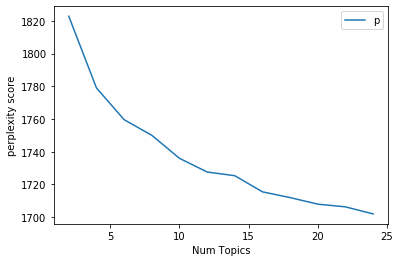

In [16]:
# Show graph

import matplotlib.pyplot as plt

limit=25; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [45]:
#LDA
%env JOBLIB_TEMP_FOLDER=/tmp
n, m = vecs.shape
k = 16 ## OPTIMAL NUMBER OF TOPICS
lda = LatentDirichletAllocation(n_components = k, doc_topic_prior = 50/k, topic_word_prior = 0.1, learning_method = 'online',random_state = 1234, n_jobs = 1)
lda_output = lda.fit_transform(vecs)

env: JOBLIB_TEMP_FOLDER=/tmp


In [46]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(lda, feature_names, 15)

Topic 0:
order table minute said server took asked waitress told manager another customer ask left seated
Topic 1:
service best friendly staff location recommend excellent family restaurant clean phoenix fast town quality highly
Topic 2:
nice drink night happy friend hour area around people looking went inside patio outside well
Topic 3:
ordered didnt star two give though home husband big decided thought enough eating bbq side
Topic 4:
delicious menu breakfast option egg sweet try item free choice potato bacon yummy spot sunday
Topic 5:
pizza salad cheese bread sauce fresh italian made ingredient pasta tomato large crust right garlic
Topic 6:
bar old kid room music parking see door game there walk fun look loud lot
Topic 7:
chicken dish roll sushi rice restaurant soup shrimp spicy fried fish fresh bowl thai sauce
Topic 8:
place great love amazing definitely awesome everything atmosphere super loved fantastic absolutely must fun everyone
Topic 9:
taco flavor meat hot salsa chip mexican 

In [26]:
# Compute Perplexity - Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  1715.5055349655654


In [50]:
import joblib
#Save a model to disk, or reload a pre-trained model

lda_pos=lda
joblib.dump(lda_pos, 'lda_pos.jl')

In [101]:
# # then reload it with
lda_pos_disk = joblib.load('lda_pos.jl')

In [76]:
# Create Document - Topic Matrix
#I choose model_list[2] where the number of topics is 6
lda_pos_output = lda_pos.transform(vecs)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_pos.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(docs_pos))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_pos_output, 5), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
num_doc_to_show = 10  # change this to display the number of documents shown below
df_document_topics = df_document_topic.head(num_doc_to_show).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,dominant_topic
Doc0,0.04462,0.11209,0.0429,0.04727,0.07045,0.06834,0.04625,0.064,0.07008,0.07864,0.11119,0.04285,0.04281,0.07064,0.04503,0.04284,1
Doc1,0.04312,0.0464,0.04312,0.03335,0.06692,0.11367,0.03546,0.05974,0.06762,0.12354,0.07298,0.05955,0.03357,0.0668,0.06822,0.06594,9
Doc2,0.04207,0.12644,0.08082,0.09673,0.02943,0.07239,0.06745,0.05247,0.05762,0.03671,0.06115,0.06171,0.03757,0.06528,0.05526,0.05688,1
Doc3,0.04624,0.04465,0.07678,0.06163,0.0474,0.05011,0.05066,0.07981,0.07315,0.06051,0.04596,0.05639,0.04603,0.1448,0.07064,0.04522,13
Doc4,0.04365,0.0368,0.03741,0.0485,0.0605,0.05699,0.06067,0.18707,0.07197,0.07162,0.0394,0.0578,0.03729,0.04548,0.03701,0.10781,7
Doc5,0.03769,0.05868,0.04838,0.07765,0.04093,0.06221,0.04434,0.10502,0.07185,0.04211,0.05509,0.09948,0.03686,0.08053,0.04062,0.09855,7
Doc6,0.05924,0.03791,0.02703,0.06846,0.07262,0.08438,0.03916,0.241,0.02535,0.04165,0.03074,0.05445,0.02817,0.12262,0.03092,0.0363,7
Doc7,0.05123,0.06664,0.07932,0.05333,0.0562,0.05313,0.05329,0.05361,0.10125,0.05378,0.05219,0.05174,0.06877,0.05124,0.05132,0.10297,15
Doc8,0.03722,0.03601,0.03707,0.07465,0.03856,0.03933,0.03808,0.11186,0.05016,0.04047,0.1005,0.1393,0.09668,0.06687,0.04466,0.04859,11
Doc9,0.04289,0.04598,0.04351,0.04514,0.07444,0.05925,0.04298,0.08297,0.07061,0.04697,0.08809,0.08366,0.11526,0.04281,0.07056,0.04487,12


In [78]:
#Code to save theta
import pandas as pd

df_document_topics.to_excel("doc_topic_pos.xlsx")

In [77]:
# Write code here to save top 10 words for each topic (beta)
top_words_per_topic = []
    
for topic_idx, topic in enumerate(lda_pos.components_):
    topic_word_P = [(topic_idx, feature_names[i], topic[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
    top_words_per_topic.extend(topic_word_P)

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words_pos.csv")

### Using Count vectorizer for negative docs

In [188]:
# CountVectorizer converts the text documents to a matrix of token counts
vectorizer = CountVectorizer(min_df = 15, max_df = 0.5, max_features = 100000)
vecs = vectorizer.fit_transform(docs_neg)

# get_feature_names saves all the words. This allows us to see the words in each topic later
feature_names = vectorizer.get_feature_names()

In [189]:
vecs

<168720x11572 sparse matrix of type '<class 'numpy.int64'>'
	with 6401105 stored elements in Compressed Sparse Row format>

In [88]:
import gc

In [89]:
gc.collect()

513

### Alpha = 50/Num_topics and Beta = 0.1

In [66]:
# Can take a long time to run. In this case we are going to k_max=20.
import datetime
print(datetime.datetime.now())

model_list = []
perplexity_values = []
model_topics = []

for num_topics in range(2, 25, 2):
    %env JOBLIB_TEMP_FOLDER=/tmp
    lda = LatentDirichletAllocation(n_components=num_topics, doc_topic_prior = 50/num_topics, topic_word_prior = 0.1, learning_method = 'online',random_state = 1234, n_jobs = -1)
    lda.fit_transform(vecs)
    model_topics.append(num_topics)
    model_list.append(lda)
    perplexity_values.append(lda.perplexity(vecs))
    print("#Topics: " + str(num_topics) + ", Score: " + str(lda.perplexity(vecs)))

print(datetime.datetime.now())

2020-07-23 04:20:46.750114
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 2, Score: 1481.3615336822925
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 4, Score: 1460.4242928242616
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 6, Score: 1461.0353832231683
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 8, Score: 1441.7584698012329
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 10, Score: 1445.1075422099814
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 12, Score: 1440.6620717512913
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 14, Score: 1438.5562071102695
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 16, Score: 1439.6813728399097
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 18, Score: 1437.9277709126811
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 20, Score: 1442.9403406905965
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 22, Score: 1444.4893808554618
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 24, Score: 1439.5963599144554
2020-07-23 08:41:58.145871


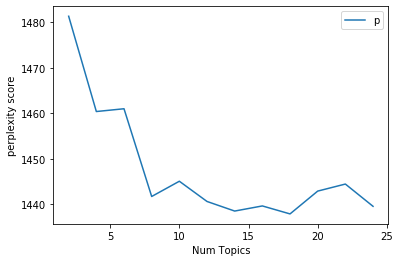

In [67]:
# Show graph

import matplotlib.pyplot as plt

limit=25; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [62]:
#LDA
%env JOBLIB_TEMP_FOLDER=/tmp
n, m = vecs.shape
k = 14 ## OPTIMAL NUMBER OF TOPICS
lda = LatentDirichletAllocation(n_components = k, doc_topic_prior = 50/k, topic_word_prior = 0.1, learning_method = 'online',random_state = 1234, n_jobs = -1)
lda_output = lda.fit_transform(vecs)

env: JOBLIB_TEMP_FOLDER=/tmp


In [63]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(lda, feature_names, 15)

Topic 0:
salad sandwich small menu ordered bread side little lunch portion fresh dinner lettuce disappointing served
Topic 1:
food bad eat dont terrible place service good slow awful eating recommend go restaurant cold
Topic 2:
cheese cold fry burger taco ordered hard steak burrito breakfast chip meat bean egg potato
Topic 3:
location always go employee drive work line need counter every behind open coffee working hand
Topic 4:
chicken sauce rice flavor taste fried dish good ordered beef soup roll bland tasted dry
Topic 5:
order service never time horrible come wrong take long back worst poor go hour right
Topic 6:
time first two disappointed didnt restaurant meal visit experience almost really second try last three
Topic 7:
bar night beer people place game bartender drink lot area saturday atmosphere sunday though staff
Topic 8:
place dirty staff see room disgusting look use area stay kitchen dining clean around floor
Topic 9:
minute table server drink took wait waitress another waite

In [64]:
# Compute Perplexity - Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(vecs))

Perplexity:  1438.5594958019556


In [66]:
import joblib
#Save a model to disk, or reload a pre-trained model

lda_neg=lda
joblib.dump(lda_neg, 'lda_neg.jl')

In [91]:
# # then reload it with
lda_neg_disk = joblib.load('lda_neg.jl')

In [ ]:
# Create Document - Topic Matrix
#I choose model_list[2] where the number of topics is 6
lda_neg_output = lda_neg_disk.transform(vecs)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_neg.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(docs_neg))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_neg_output, 5), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
num_doc_to_show = 10  # change this to display the number of documents shown below
df_document_topics = df_document_topic.head(num_doc_to_show).style.applymap(color_green).applymap(make_bold)
df_document_topics

In [68]:
df_document_topics.to_excel("doc_topic_neg.xlsx")

In [70]:
# Write code here to save top 10 words for each topic (beta)
top_words_per_topic = []
    
for topic_idx, topic in enumerate(lda_neg.components_):
    topic_word_P = [(topic_idx, feature_names[i], topic[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
    top_words_per_topic.extend(topic_word_P)

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words_neg.csv")

### Using TfIdf vectorizer for negative docs

In [68]:
# CountVectorizer converts the text documents to a matrix of token counts
vectorizer = TfidfVectorizer(min_df = 15, max_df = 0.5, max_features = 100000)
vecs = vectorizer.fit_transform(docs_neg)

# get_feature_names saves all the words. This allows us to see the words in each topic later
feature_names = vectorizer.get_feature_names()

In [69]:
vecs

<168720x11572 sparse matrix of type '<class 'numpy.float64'>'
	with 6401105 stored elements in Compressed Sparse Row format>

In [70]:
import gc

In [71]:
gc.collect()

4063

### Alpha = 50/Num_topics and Beta = 0.1

In [72]:
# Can take a long time to run. In this case we are going to k_max=20.
import datetime
print(datetime.datetime.now())

model_list = []
perplexity_values = []
model_topics = []

for num_topics in range(2, 25, 2):
    %env JOBLIB_TEMP_FOLDER=/tmp
    lda = LatentDirichletAllocation(n_components=num_topics, doc_topic_prior = 50/num_topics, topic_word_prior = 0.1, learning_method = 'online',random_state = 1234, n_jobs = -1)
    lda.fit_transform(vecs)
    model_topics.append(num_topics)
    model_list.append(lda)
    perplexity_values.append(lda.perplexity(vecs))
    print("#Topics: " + str(num_topics) + ", Score: " + str(lda.perplexity(vecs)))

print(datetime.datetime.now())

2020-07-23 08:42:12.174396
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 2, Score: 2739.8318054250126
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 4, Score: 2872.629193407527
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 6, Score: 2993.606483068568
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 8, Score: 3109.6104306801526
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 10, Score: 3223.390338254016
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 12, Score: 3336.2395016652267
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 14, Score: 3448.5770237186807
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 16, Score: 3561.8388931506634
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 18, Score: 3675.198329889106
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 20, Score: 3790.1567652263866
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 22, Score: 3907.2297966186165
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 24, Score: 4025.515487270394
2020-07-23 12:40:32.089630


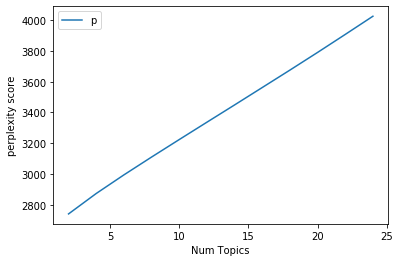

In [73]:
# Show graph

import matplotlib.pyplot as plt

limit=25; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

### Using TfIdf vectorizer for positive docs

In [17]:
# CountVectorizer converts the text documents to a matrix of token counts
vectorizer = TfidfVectorizer(min_df = 15, max_df = 0.5, max_features = 100000)
vecs = vectorizer.fit_transform(docs_pos)

# get_feature_names saves all the words. This allows us to see the words in each topic later
feature_names = vectorizer.get_feature_names()

In [18]:
vecs

<1274018x33041 sparse matrix of type '<class 'numpy.float64'>'
	with 49423401 stored elements in Compressed Sparse Row format>

In [19]:
gc.collect()

2911

### Alpha = 50/Num_topics and Beta = 0.1

In [20]:
# Can take a long time to run. In this case we are going to k_max=20.
import datetime
print(datetime.datetime.now())

model_list = []
perplexity_values = []
model_topics = []

for num_topics in range(2, 25, 2):
    %env JOBLIB_TEMP_FOLDER=/tmp
    lda = LatentDirichletAllocation(n_components=num_topics, doc_topic_prior = 50/num_topics, topic_word_prior = 0.1, learning_method = 'online',random_state = 1234, n_jobs = 1)
    lda.fit_transform(vecs)
    model_topics.append(num_topics)
    model_list.append(lda)
    perplexity_values.append(lda.perplexity(vecs))
    print("#Topics: " + str(num_topics) + ", Score: " + str(lda.perplexity(vecs)))

print(datetime.datetime.now())

2020-07-24 12:45:37.432388
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 2, Score: 3321.2496306611292
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 4, Score: 3420.872144695285
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 6, Score: 3515.668327338342
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 8, Score: 3609.151953041334
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 10, Score: 3703.1898185383097
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 12, Score: 3798.2156395574943
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 14, Score: 3894.4300854227968
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 16, Score: 3991.9082002495174
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 18, Score: 4090.780193513668
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 20, Score: 4191.794885778961
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 22, Score: 4292.801122682917
env: JOBLIB_TEMP_FOLDER=/tmp
#Topics: 24, Score: 4394.80288361269
2020-07-25 07:22:21.800676


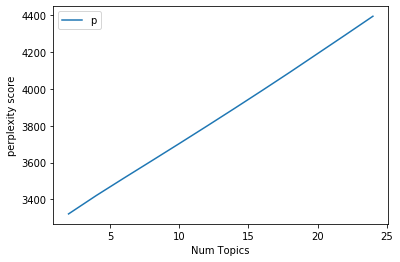

In [21]:
# Show graph

import matplotlib.pyplot as plt

limit=25; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [37]:
#Set up the environment to display the graphical outputs
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

C:\Users\z1san1301\AppData\Local\Continuum\anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [95]:
# Generate the visuals
visual_neg = pyLDAvis.sklearn.prepare(lda_neg_disk, vecs, vectorizer, mds='tsne',sort_topics = False)

C:\Users\z1san1301\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [96]:
#Save the output|to the html file
pyLDAvis.save_html(visual_neg, "Negative_topic_viz_sklearn.html")

In [105]:
# Generate the visuals
visual_pos = pyLDAvis.sklearn.prepare(lda_pos_disk, vecs, vectorizer, mds='tsne',sort_topics = False)

C:\Users\z1san1301\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [106]:
#Save the output|to the html file
pyLDAvis.save_html(visual_pos, "Positive_topic_viz_sklearn.html")

# DEMO

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from textblob import Word
import re
import joblib
import pickle
import warnings
warnings.filterwarnings(action='ignore') 

In [181]:
lda_pos_disk = joblib.load('lda_pos.jl')
lda_neg_disk = joblib.load('lda_neg.jl')

In [388]:
test_lda_neg = rev_neg[100:200]
test_lda_neg.to_csv('test_lda_neg.csv')

In [389]:
test_lda_pos = rev_pos[100:200]
test_lda_pos.to_csv('test_lda_pos.csv')

In [390]:
test_lda_neg = pd.read_csv('test_lda_neg.csv')
test_lda_pos = pd.read_csv('test_lda_pos.csv')

### NEGATIVE TOPICS

In [384]:
docs = list(test_lda_neg['text'])

docs1 = []
for i in range(len(docs)):
    docs1.append(nltk.word_tokenize(docs[i]))
                
docs2 = [[w.lower() for w in doc] for doc in docs1]
docs3 = [[w for w in doc if re.search('^[a-z]+$', w)] for doc in docs2]
docs4 = [[w for w in doc if w not in stop_list] for doc in docs3]
docs5 = [[Word(w).lemmatize() for w in doc] for doc in docs4]
test_docs_joined = [" ".join(x) for x in docs5] 

In [385]:
vectorizer = CountVectorizer()
test_vecs = vectorizer.fit_transform(test_docs_joined)

# Call LDA model from disk print the topics for each document in the TestLDA

for i in range(len(test_docs_joined)):
    output = lda_neg_disk.fit_transform(test_vecs[i])
    dominant_topic = np.argmax(output, axis=1)
    print("test doc" + str(i) + ": " + str(dominant_topic))
    #print("test doc" + str(i) + ": " + str(output))

test doc0: [5]
test doc1: [2]
test doc2: [6]
test doc3: [13]
test doc4: [7]
test doc5: [11]
test doc6: [5]
test doc7: [4]
test doc8: [0]
test doc9: [6]
test doc10: [0]
test doc11: [13]
test doc12: [10]
test doc13: [5]
test doc14: [6]
test doc15: [9]
test doc16: [5]
test doc17: [0]
test doc18: [6]
test doc19: [7]
test doc20: [0]
test doc21: [12]
test doc22: [0]
test doc23: [12]
test doc24: [12]
test doc25: [5]
test doc26: [12]
test doc27: [0]
test doc28: [7]
test doc29: [7]
test doc30: [5]
test doc31: [1]
test doc32: [12]
test doc33: [11]
test doc34: [6]
test doc35: [6]
test doc36: [12]
test doc37: [5]
test doc38: [8]
test doc39: [6]
test doc40: [7]
test doc41: [12]
test doc42: [9]
test doc43: [4]
test doc44: [5]
test doc45: [1]
test doc46: [12]
test doc47: [8]
test doc48: [3]
test doc49: [0]
test doc50: [9]
test doc51: [7]
test doc52: [3]
test doc53: [11]
test doc54: [6]
test doc55: [4]
test doc56: [10]
test doc57: [5]
test doc58: [11]
test doc59: [9]
test doc60: [0]
test doc61: [5]
te

In [386]:
feature_names = vectorizer.get_feature_names()

lda_neg_disk.fit_transform(test_vecs[50]) # change the doc number
topic_highest_prob = lda_neg_disk.components_[9]  # change the topic number
print([(feature_names[i], topic_highest_prob[i]) for i in topic_highest_prob.argsort()[:-15 - 1:-1]])

[('rude', 0.45064555270717266), ('arrogant', 0.4213999193073967), ('never', 0.3942120935820929), ('ever', 0.3729526259431216), ('time', 0.37163631277892295), ('raspado', 0.36808510790761373), ('expensive', 0.36657005430805567), ('get', 0.3548283935087426), ('think', 0.3519431525575193), ('serve', 0.3470102704256639), ('money', 0.34630664991730264), ('place', 0.3436262121930886), ('meal', 0.34248543698823924), ('bought', 0.33704252300409476), ('topping', 0.33671492341289305)]


In [391]:
test_lda_neg['text'][50]

'The employees were rude and arrogant. For the kind of staff that they serve I think is too expensive -might as well just get yourself a meal. I bought a raspado there, and it was disgusting. Never waisting my time or money in that disgusting/unfriendly place. Ever.'

### POSITIVE TOPICS

In [392]:
docs = list(test_lda_pos['text'])

docs1 = []
for i in range(len(docs)):
    docs1.append(nltk.word_tokenize(docs[i]))
                
docs2 = [[w.lower() for w in doc] for doc in docs1]
docs3 = [[w for w in doc if re.search('^[a-z]+$', w)] for doc in docs2]
docs4 = [[w for w in doc if w not in stop_list] for doc in docs3]
docs5 = [[Word(w).lemmatize() for w in doc] for doc in docs4]
test_docs_joined = [" ".join(x) for x in docs5] 

In [393]:
vectorizer = CountVectorizer()
test_vecs = vectorizer.fit_transform(test_docs_joined)

# Call LDA model from disk print the topics for each document in the TestLDA

for i in range(len(test_docs_joined)):
    output = lda_pos_disk.fit_transform(test_vecs[i])
    dominant_topic = np.argmax(output, axis=1)
    print("test doc" + str(i) + ": " + str(dominant_topic))
    #print("test doc" + str(i) + ": " + str(output))

test doc0: [2]
test doc1: [7]
test doc2: [6]
test doc3: [8]
test doc4: [2]
test doc5: [7]
test doc6: [1]
test doc7: [6]
test doc8: [2]
test doc9: [7]
test doc10: [15]
test doc11: [15]
test doc12: [13]
test doc13: [13]
test doc14: [4]
test doc15: [8]
test doc16: [0]
test doc17: [5]
test doc18: [14]
test doc19: [6]
test doc20: [14]
test doc21: [13]
test doc22: [1]
test doc23: [9]
test doc24: [13]
test doc25: [3]
test doc26: [13]
test doc27: [6]
test doc28: [4]
test doc29: [6]
test doc30: [0]
test doc31: [6]
test doc32: [15]
test doc33: [4]
test doc34: [0]
test doc35: [6]
test doc36: [11]
test doc37: [12]
test doc38: [10]
test doc39: [6]
test doc40: [7]
test doc41: [15]
test doc42: [1]
test doc43: [14]
test doc44: [6]
test doc45: [10]
test doc46: [13]
test doc47: [10]
test doc48: [4]
test doc49: [5]
test doc50: [2]
test doc51: [10]
test doc52: [4]
test doc53: [7]
test doc54: [7]
test doc55: [9]
test doc56: [11]
test doc57: [15]
test doc58: [2]
test doc59: [7]
test doc60: [4]
test doc61: [

In [394]:
feature_names = vectorizer.get_feature_names()

lda_pos_disk.fit_transform(test_vecs[50]) # change the doc number
topic_highest_prob = lda_pos_disk.components_[2]  # change the topic number
print([(feature_names[i], topic_highest_prob[i]) for i in topic_highest_prob.argsort()[:-15 - 1:-1]])

[('shop', 0.40864231369158255), ('sandwich', 0.3957384472505292), ('clean', 0.3946259732021555), ('would', 0.3856433905929175), ('consistent', 0.3755013141434971), ('review', 0.3744374409312405), ('friendly', 0.37038303093755987), ('deserve', 0.3669910404477445), ('sprite', 0.3478673940100611), ('recognition', 0.34445422228990796), ('best', 0.34392462061335033), ('gotten', 0.33937550871085564), ('refers', 0.3378483505074978), ('lot', 0.3369347644204862), ('standout', 0.33561275705210036)]


In [395]:
test_lda_pos['text'][50]

"Normally I wouldn't write a review on a sandwich shop but the group of people working here deserve recognition. Always friendly, clean and consistent. Some of the best sandwiches I've had and they got eegees which is a plus!"

### GAP ANALYSIS

In [396]:
docs = list(test_lda_neg['text'][:10])

docs1 = []
for i in range(len(docs)):
    docs1.append(nltk.word_tokenize(docs[i]))
                
docs2 = [[w.lower() for w in doc] for doc in docs1]
docs3 = [[w for w in doc if re.search('^[a-z]+$', w)] for doc in docs2]
docs4 = [[w for w in doc if w not in stop_list] for doc in docs3]
docs5 = [[Word(w).lemmatize() for w in doc] for doc in docs4]
test_docs_joined = [" ".join(x) for x in docs5] 

In [397]:
vectorizer = CountVectorizer()
test_vecs = vectorizer.fit_transform(test_docs_joined)

# Call LDA model from disk print the topics for each document in the TestLDA

for i in range(len(test_docs_joined)):
    output = lda_neg_disk.fit_transform(test_vecs[i])
    dominant_topic = np.argmax(output, axis=1)
    print("test doc" + str(i) + ": " + str(dominant_topic))
    #print("test doc" + str(i) + ": " + str(output))

test doc0: [3]
test doc1: [13]
test doc2: [5]
test doc3: [2]
test doc4: [7]
test doc5: [0]
test doc6: [10]
test doc7: [7]
test doc8: [10]
test doc9: [10]


In [398]:
feature_names = vectorizer.get_feature_names()

lda_neg_disk.fit_transform(test_vecs[0]) # change the doc number
topic_highest_prob = lda_neg_disk.components_[3]  # change the topic number
print([(feature_names[i], topic_highest_prob[i]) for i in topic_highest_prob.argsort()[:-15 - 1:-1]])

[('ring', 0.7018598785544481), ('cheese', 0.5018431378691434), ('shake', 0.4480743820557032), ('away', 0.44573390830786613), ('lettuce', 0.4400415389856592), ('tomato', 0.4281610810414184), ('attention', 0.4221638420320192), ('sirloin', 0.4108908835037116), ('people', 0.40356099398168915), ('thought', 0.40298081073129205), ('tasteless', 0.3969418459734113), ('restaurant', 0.39230341967084714), ('lb', 0.3916545999131497), ('stay', 0.39074828598873806), ('need', 0.39022557377088257)]


In [399]:
test_lda_neg['text'][0]

"Should have paid more attention to the negative reviews on here and stayed away!  Way over priced! My husband had a single 1/4 lb with cheese, bacon, mayo, lettuce and tomato; order of onion rings and a chocolate shake. I had the 1/4 lb combo with cheese, tomato and lettuce; onion rings and a Coke.  The patties were thin and tasteless, the tomatoes were not ripe at all and the bun was smashed. The onion rings were fried hard, Sonic has way better! \nThe grand total with tax was $29.56!! His shake was $4.99. I thought the cashier rang us up incorrectly, nope! We get two 6 oz sirloin STEAK dinners at Texas Roadhouse for $22! Or go to Zinburger for a great $10 burger. I don't  see how this place stays open; Saturday night at 7:30 and only 4 other people in the entire restaurant. Must be because they are do overpriced. We usually support locally owned restaurants but this is one that needs to close. Sorry."

In [336]:
# 1. Less interpretability of topics - can use bigrams and trigrams
# 2. Multiple issues discussed - Topics with unigrams not very clear. Name of cuisine/dishes spams topics
# 3. Impact of sentiment misclassification  on topics